In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
train_df = pd.read_csv(Add path to train data here)

In [ ]:
df = pd.read_csv(Add path to train data here)
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Get the columns with more than 20% missing data
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
display(df_cleaned.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def read_data(file_name):
  df = pd.read_csv(Add path to train data here) # Use the file_name parameter
  print(file_name, 'has', len(df), 'data points')
  return df

In [ ]:
# If you want to see the number of data points, call the function like this:
train_df_read = read_data(Add path to train data here)

C:\Users\fabrizio natali\Desktop\dissertation\train_data.csv has 307511 data points


In [7]:
# Identify non-numeric columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=np.number).columns
print("Non-numeric columns found:", non_numeric_cols)

Non-numeric columns found: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [8]:
# Apply one-hot encoding to convert non-numeric columns to numeric
df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)
display(df_encoded.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Verify that all columns are now numeric (except potentially the target variable if it was non-numeric initially)
print("Data types after encoding:")
display(df_encoded.dtypes)

Data types after encoding:


SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
                                        ...   
ORGANIZATION_TYPE_Transport: type 2       bool
ORGANIZATION_TYPE_Transport: type 3       bool
ORGANIZATION_TYPE_Transport: type 4       bool
ORGANIZATION_TYPE_University              bool
ORGANIZATION_TYPE_XNA                     bool
Length: 167, dtype: object

In [10]:
# Use the real data instead of generating sample data
# Separate features (X) and target (y) from the real dataset
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

print(f"Real dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target distribution:")
print(y.value_counts())

Real dataset shape: (307511, 166)
Number of features: 166
Number of samples: 307511
Target distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [11]:
# Split the real data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution:")
print(y_train.value_counts())
print(f"Test target distribution:")
print(y_test.value_counts())

Training set shape: (246008, 166)
Test set shape: (61503, 166)
Training target distribution:
TARGET
0    226126
1     19882
Name: count, dtype: int64
Test target distribution:
TARGET
0    56560
1     4943
Name: count, dtype: int64


In [12]:
# Split the data into features (X) and target (y)
X = train_df.drop('TARGET', axis=1)
y = train_df['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [13]:
# Fill missing values for numeric columns if any
X_train_numeric = X_train.select_dtypes(include=np.number)
X_train[X_train_numeric.columns] = X_train_numeric.fillna(X_train_numeric.mean())

In [14]:
# Fill missing values for numeric columns in X_test if any
X_test_numeric = X_test.select_dtypes(include=np.number)
X_test[X_test_numeric.columns] = X_test_numeric.fillna(X_train_numeric.mean())

In [15]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, dummy_na=False)
X_test = pd.get_dummies(X_test, columns=categorical_cols, dummy_na=False)

# Ensure that the columns are the same in both train and test sets after one-hot encoding
# This is important for consistent feature sets during model training and prediction
train_cols = set(X_train.columns)
test_cols = set(X_test.columns)

missing_in_test = list(train_cols - test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = list(test_cols - train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Sort columns to ensure the order is the same
X_train = X_train[sorted(X_train.columns)]
X_test = X_test[sorted(X_test.columns)]

In [16]:
# Initialize and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=150, random_state=42)
model.fit(X_train, y_train)

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 150 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=150).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,150
,multi_class,'deprecated'


In [17]:
# For simplicity, let's use the training data to test and show accuracy.
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", average_precision)
print("Confusion Matrix:")
print(confusion)

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Test Set Accuracy: 0.9189958213420484
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Average Precision Score: 0.08100417865795165
Confusion Matrix:
[[56521     0]
 [ 4982     0]]


In [19]:
# Separate features (X) and target (y) from the real dataset
X_real = df_encoded.drop('TARGET', axis=1)
y_real = df_encoded['TARGET']

# Split the real data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
	X_real, y_real, test_size=0.2, random_state=42
)

# Impute missing values (LogisticRegression cannot handle NaNs)
# Using median to be robust to skewed distributions
numeric_cols = X_train_real.columns  # all columns are numeric after get_dummies
imputer = SimpleImputer(strategy='median')
X_train_real = pd.DataFrame(imputer.fit_transform(X_train_real), columns=numeric_cols, index=X_train_real.index)
X_test_real = pd.DataFrame(imputer.transform(X_test_real), columns=numeric_cols, index=X_test_real.index)

# Train Logistic Regression model
model_real = LogisticRegression(max_iter=150, random_state=42)
model_real.fit(X_train_real, y_train_real)

# Derive "feature importance" from absolute value of coefficients
column_names = numeric_cols.tolist()
coefficients = model_real.coef_[0]
feature_importances = pd.Series(np.abs(coefficients), index=column_names)

# Sort the importances in descending order and display the top 10
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top 10 most important features (by |coefficient|):")
print(top_features)

Top 10 most important features (by |coefficient|):
DAYS_ID_PUBLISH            1.260447e-04
DAYS_LAST_PHONE_CHANGE     1.057460e-04
DAYS_BIRTH                 8.310284e-05
DAYS_REGISTRATION          2.961575e-05
AMT_ANNUITY                8.200729e-06
AMT_GOODS_PRICE            3.996794e-06
AMT_CREDIT                 3.109524e-06
AMT_INCOME_TOTAL           1.576166e-06
SK_ID_CURR                 1.008830e-06
HOUR_APPR_PROCESS_START    6.864397e-07
dtype: float64


C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 150 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=150).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


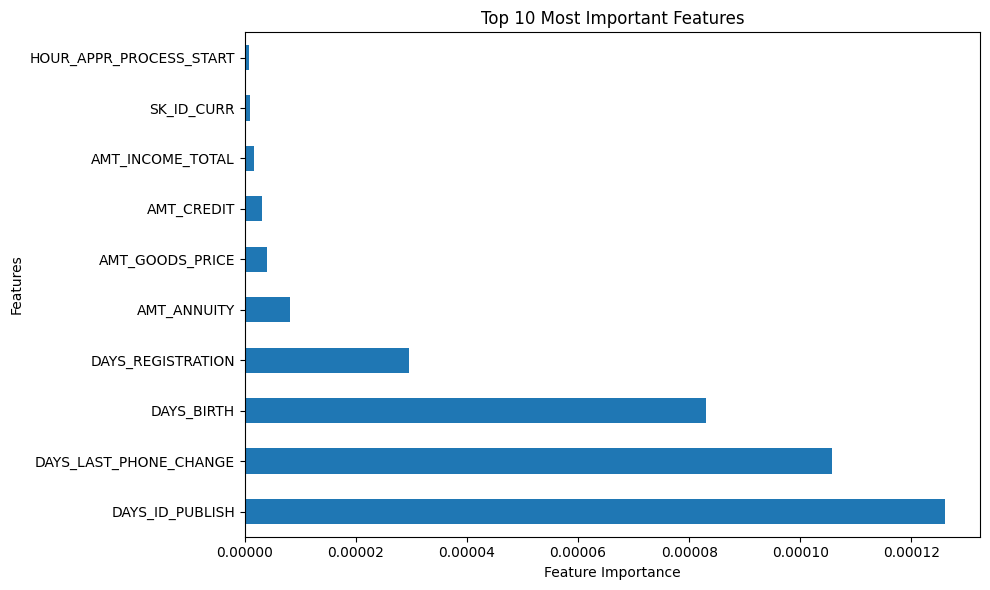

In [20]:
import matplotlib.pyplot as plt  # Added import to fix NameError

# Visualize feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

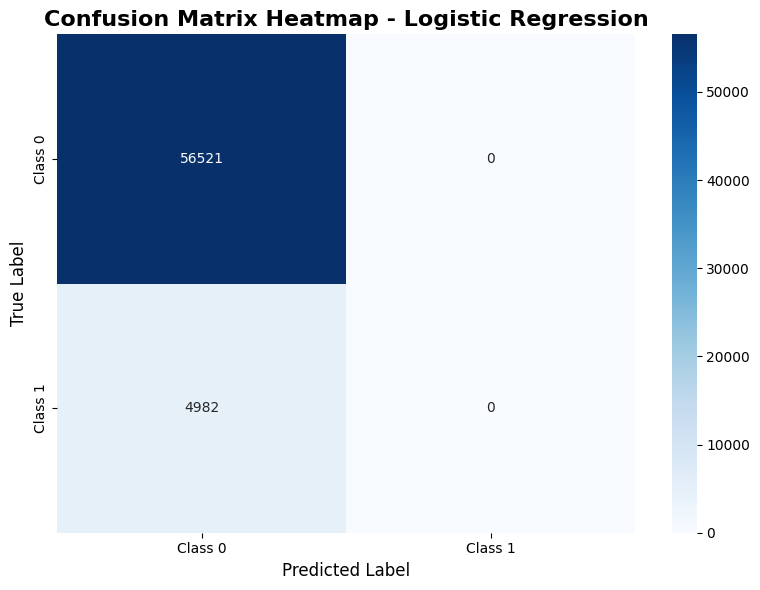


Confusion Matrix Breakdown:
True Negatives (TN): 56521
False Positives (FP): 0
False Negatives (FN): 4982
True Positives (TP): 0
Specificity (TN Rate): 1.000
Sensitivity (TP Rate): 0.000


In [21]:
# Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap - Logistic Regression', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix breakdown
tn, fp, fn, tp = confusion.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Specificity (TN Rate): {tn/(tn+fp):.3f}")
print(f"Sensitivity (TP Rate): {tp/(tp+fn):.3f}")

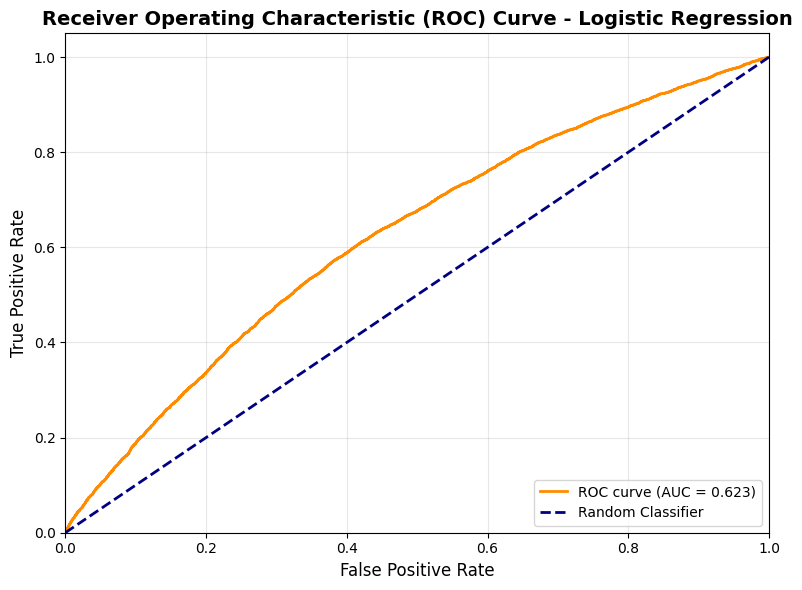

In [22]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_curve = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_curve:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

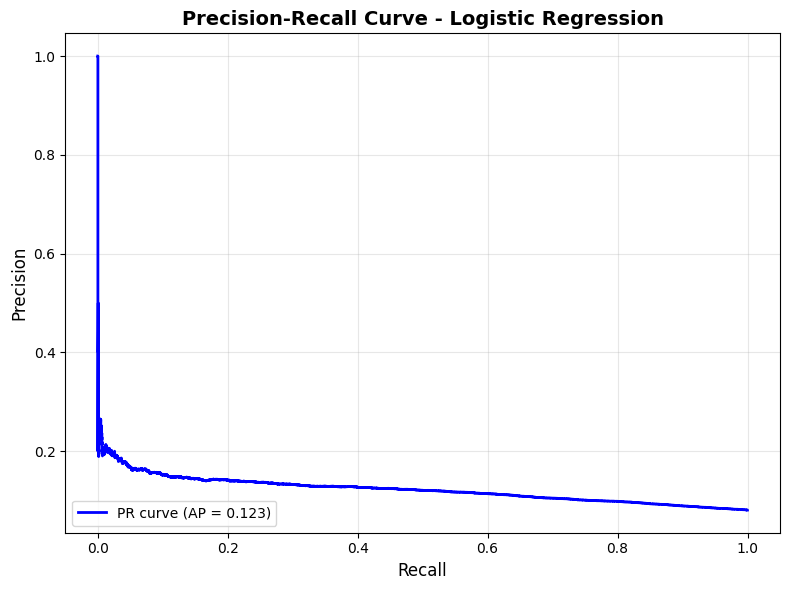

In [23]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

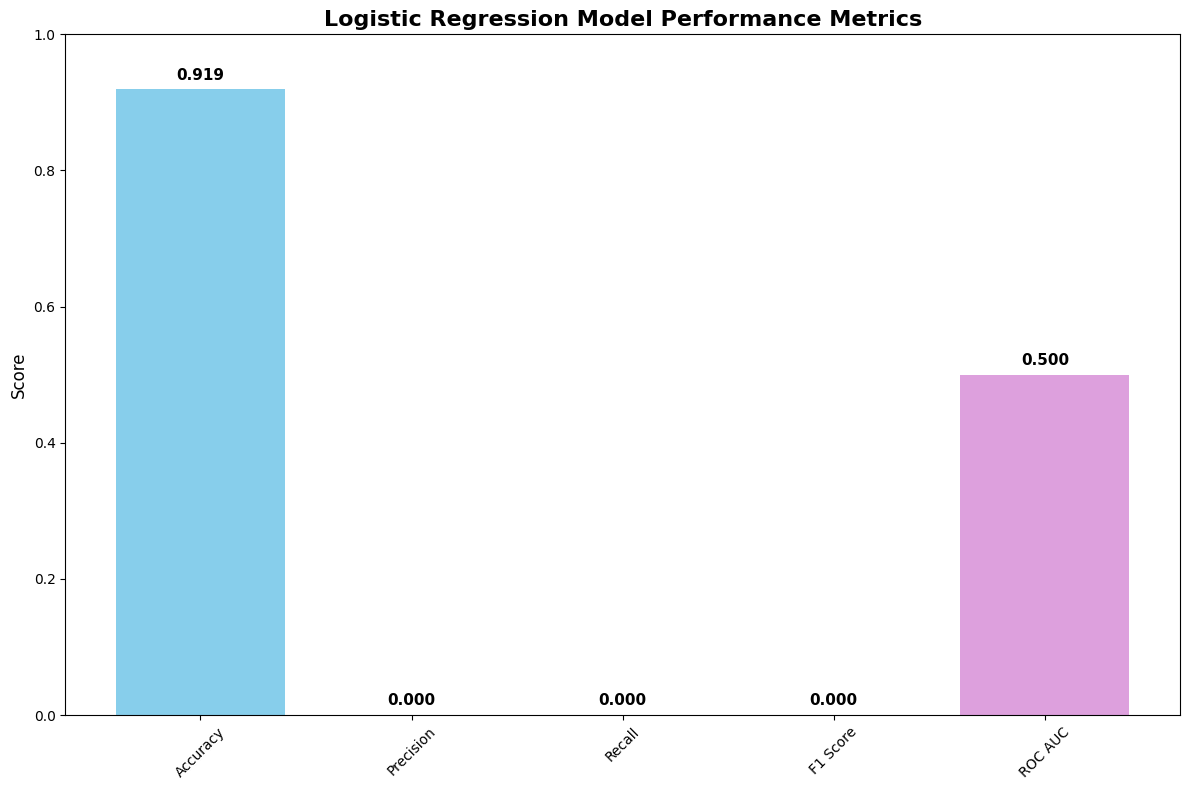


=== LOGISTIC REGRESSION MODEL SUMMARY ===
Total Features Used: 245
Model Intercept: -0.0000
Training Set Size: 246008
Test Set Size: 61503
Max Iterations: 150
Converged: False

=== PERFORMANCE METRICS ===
Accuracy       : 0.9190
Precision      : 0.0000
Recall         : 0.0000
F1 Score       : 0.0000
ROC AUC        : 0.5000
Avg Precision   : 0.0810


In [24]:
# Model Performance Metrics Visualization
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

plt.figure(figsize=(12, 8))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = plt.bar(metric_names, metric_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('Logistic Regression Model Performance Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n=== LOGISTIC REGRESSION MODEL SUMMARY ===")
print(f"Total Features Used: {len(X_train.columns)}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")
print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")
print(f"Max Iterations: {model.max_iter}")
print(f"Converged: {model.n_iter_[0] < model.max_iter}")

print(f"\n=== PERFORMANCE METRICS ===")
for metric, value in metrics.items():
    print(f"{metric:<15}: {value:.4f}")
print(f"Avg Precision   : {average_precision:.4f}")

In [25]:
# SHAP Analysis for Model Explainability (Logistic Regression)
# Use LinearExplainer (TreeExplainer does not support linear models)
# shap is already imported in a later cell (25); keep this import only if that cell may not be run first.
import shap

# Use a background dataset (training data) for the linear explainer
# X_train already prepared and aligned with X_test
background_data = X_train

# Subsample background if very large to speed up (optional)
if len(background_data) > 2000:
    background_data_bg = background_data.sample(2000, random_state=42)
else:
    background_data_bg = background_data

# Sample test set for SHAP computation
sample_size = min(100, len(X_test))
X_test_sample = X_test.iloc[:sample_size]
y_test_sample = y_test.iloc[:sample_size]

print(f"Computing SHAP values for {sample_size} test samples using LinearExplainer...")

# Create LinearExplainer (works for LogisticRegression)
explainer = shap.LinearExplainer(model, background_data_bg, feature_perturbation="interventional")

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# shap.LinearExplainer may return:
# - np.ndarray (n_samples, n_features)
# - list of two arrays for binary classification (older versions)
if isinstance(shap_values, list):
    # Take the explanation for the positive class if two outputs
    if len(shap_values) == 2:
        shap_values_to_use = shap_values[1]
        print("Detected list of SHAP arrays (binary). Using index 1 (positive class).")
    else:
        shap_values_to_use = shap_values[0]
        print("Detected list of SHAP arrays. Using first element.")
else:
    shap_values_to_use = shap_values
    print("Detected single SHAP array.")

# Expected value handling (may be scalar or array)
base_value = explainer.expected_value
if hasattr(base_value, "__len__"):
    base_value = base_value[1] if len(base_value) > 1 else base_value[0]

print("SHAP values computed successfully!")
print(f"Type of shap_values container: {type(shap_values)}")
print(f"SHAP values array shape used: {shap_values_to_use.shape}")
print(f"Base value (expected model output - logit space): {base_value:.6f}")
print(f"Sample features shape: {X_test_sample.shape}")

# Mean absolute SHAP importance
mean_shap_importance = np.abs(shap_values_to_use).mean(axis=0)

print(f"SHAP importance vector shape: {mean_shap_importance.shape}")
print(f"Number of features: {len(X_test_sample.columns)}")

if len(mean_shap_importance) == len(X_test_sample.columns):
    print("✓ Shapes match perfectly!")
else:
    print(f"⚠ Shape mismatch! SHAP: {len(mean_shap_importance)}, Features: {len(X_test_sample.columns)}")

feature_importance_shap = (
    pd.DataFrame({
        'feature': X_test_sample.columns,
        'shap_importance': mean_shap_importance
    })
    .sort_values('shap_importance', ascending=False)
)

print("\nTop 10 Most Important Features (SHAP-based):")
print(feature_importance_shap.head(10))

Computing SHAP values for 100 test samples using LinearExplainer...
Detected single SHAP array.
SHAP values computed successfully!
Type of shap_values container: <class 'numpy.ndarray'>
SHAP values array shape used: (100, 245)
Base value (expected model output - logit space): -2.520970
Sample features shape: (100, 245)
SHAP importance vector shape: (245,)
Number of features: 245
✓ Shapes match perfectly!

Top 10 Most Important Features (SHAP-based):
                    feature shap_importance
2           AMT_GOODS_PRICE        1.179824
1                AMT_CREDIT         1.00618
24               DAYS_BIRTH        0.317538
26          DAYS_ID_PUBLISH        0.171594
25            DAYS_EMPLOYED        0.089913
223              SK_ID_CURR        0.085472
27   DAYS_LAST_PHONE_CHANGE        0.078963
28        DAYS_REGISTRATION        0.075798
0               AMT_ANNUITY        0.031139
3          AMT_INCOME_TOTAL        0.028566


C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


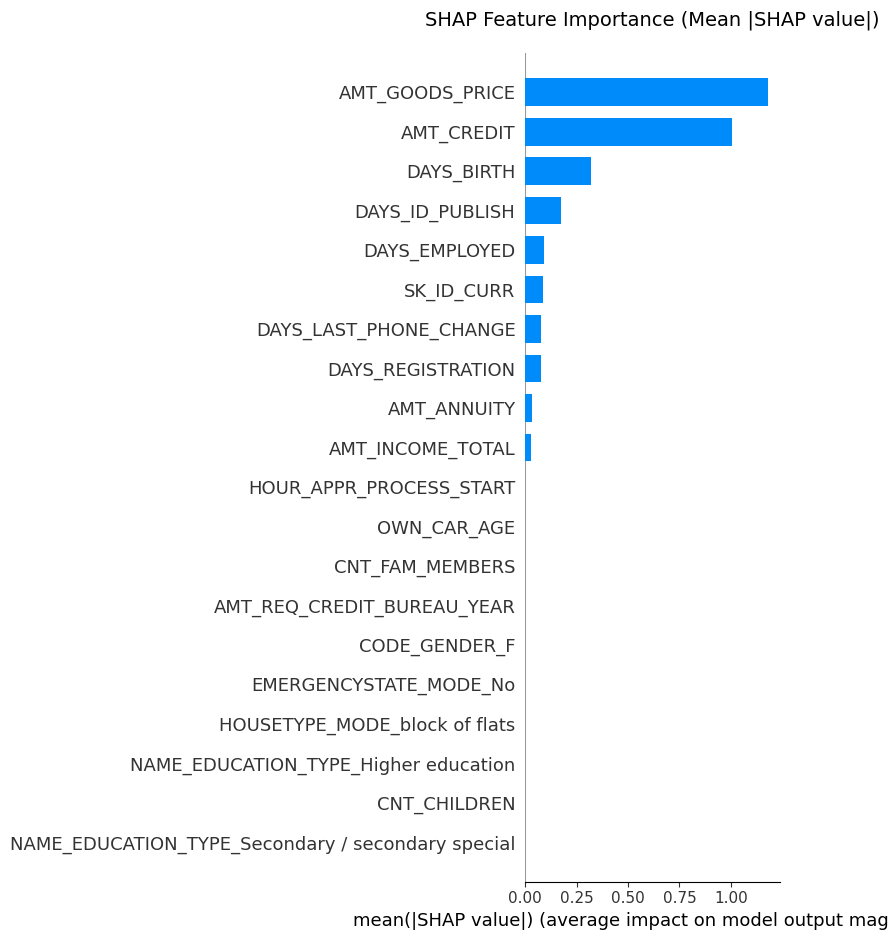

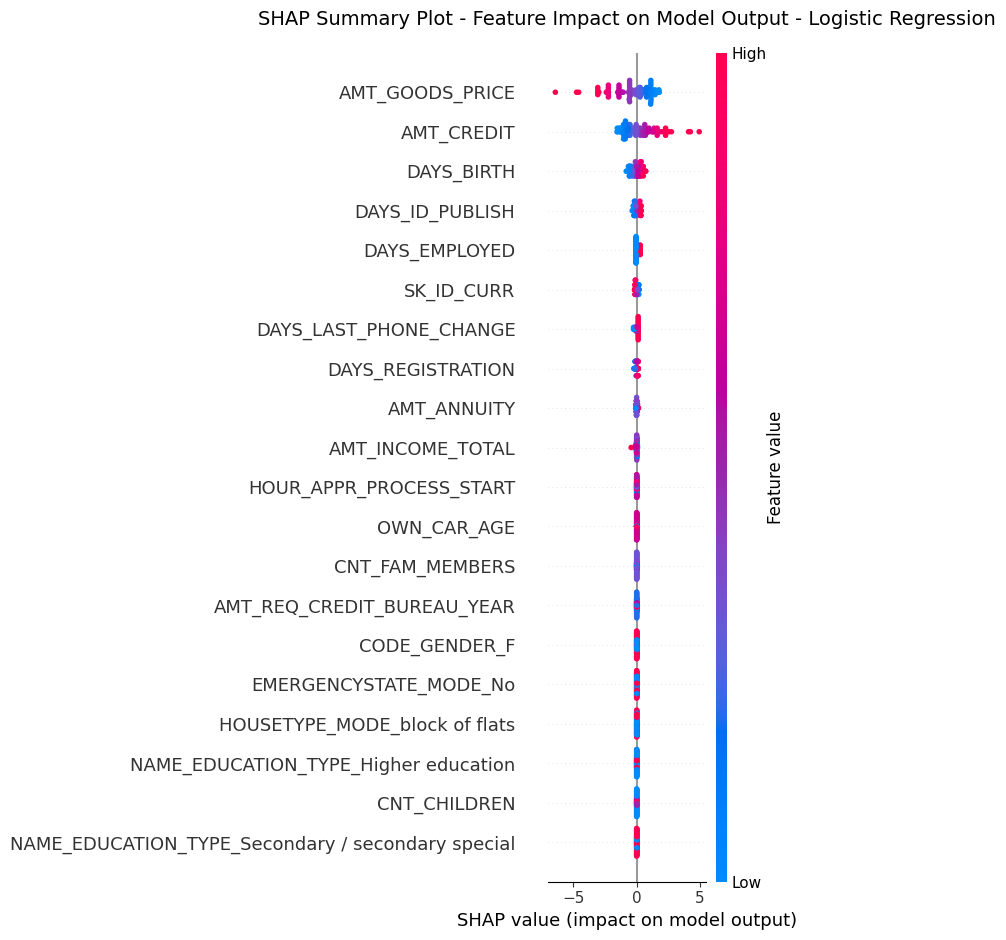

In [26]:
# Fix: ensure SHAP values are a float ndarray (original were dtype=object causing TypeError in summary_plot)
# Imports (matplotlib.pyplot as plt and shap) already done in earlier cells; reuse existing ones.

# Convert shap_values_to_use (possibly object dtype) to a clean float matrix
if isinstance(shap_values_to_use, list):
	shap_matrix = np.asarray(shap_values_to_use[0], dtype=float)
else:
	shap_matrix = np.asarray(shap_values_to_use, dtype=float)

# Ensure feature matrix passed to SHAP is numeric
X_summary = X_test_sample.copy()
for c in X_summary.columns:
	if X_summary[c].dtype == 'object':
		X_summary[c] = pd.to_numeric(X_summary[c], errors='coerce')
X_summary = X_summary.fillna(0)

# (Optional) provide variables used by later cells expecting generic names
shap_vals_2d = shap_matrix          # for downstream cell 26
base_vals_1d = base_value           # reuse computed base value from earlier cell 24

# Sanity check shapes
assert shap_matrix.shape[1] == X_summary.shape[1], f"Shape mismatch: {shap_matrix.shape} vs {X_summary.shape}"

# SHAP Summary Plot - feature importance (mean |SHAP value|)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_matrix, X_summary, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary Plot with feature value impact
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_matrix, X_summary, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Output - Logistic Regression', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [27]:
# SHAP: sanitize data for plotting (convert any object columns)
# X_eval was undefined; use the sampled test set (X_test_sample) created earlier.
# Fallback to X_summary (prepared in cell 25) if X_test_sample is not available.
try:
    X_eval_source = X_test_sample
except NameError:
    X_eval_source = X_summary  # both have consistent columns with shap_vals_2d

X_eval_plot = X_eval_source.copy()

# Convert object columns to numeric (coerce errors to NaN) then fill NaNs with 0
obj_cols = X_eval_plot.select_dtypes(include='object').columns
for col in obj_cols:
    X_eval_plot[col] = pd.to_numeric(X_eval_plot[col], errors='coerce')
X_eval_plot = X_eval_plot.fillna(0)

# Ensure SHAP values and base value are float
if shap_vals_2d.dtype != float:
    shap_vals_2d = shap_vals_2d.astype(float)

# base_vals_1d may be scalar or array-like
try:
    import numpy as np  # only if not already imported (will be ignored if already in scope)
except:
    pass
if isinstance(base_vals_1d, (list, tuple, np.ndarray)):
    base_vals_1d = np.asarray(base_vals_1d, dtype=float)
else:
    base_vals_1d = float(base_vals_1d)

# Shape consistency check
assert shap_vals_2d.shape[1] == X_eval_plot.shape[1], \
    f"Mismatch: shap columns {shap_vals_2d.shape[1]} != data columns {X_eval_plot.shape[1]}"

print("Sanitized X_eval_plot dtypes (top counts):")
print(X_eval_plot.dtypes.value_counts().head())
print(f"shap_vals_2d shape: {shap_vals_2d.shape}")

Sanitized X_eval_plot dtypes (top counts):
bool       139
float64     65
int64       41
Name: count, dtype: int64
shap_vals_2d shape: (100, 245)



=== SAMPLE 1 (Index 0) ===
Actual label: 0
Predicted probability (class 1): 0.0680


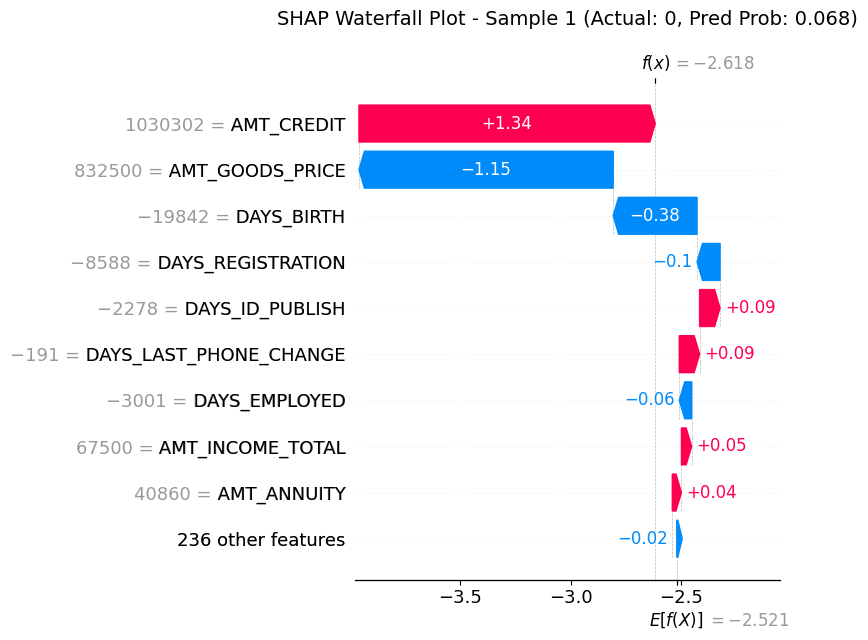


=== SAMPLE 2 (Index 1) ===
Actual label: 0
Predicted probability (class 1): 0.0889


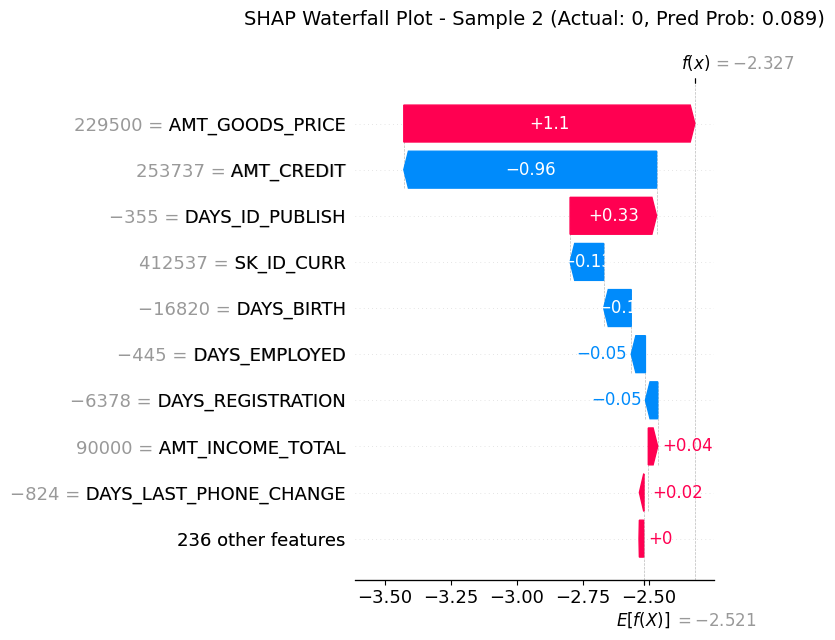


=== SAMPLE 3 (Index 2) ===
Actual label: 0
Predicted probability (class 1): 0.0536


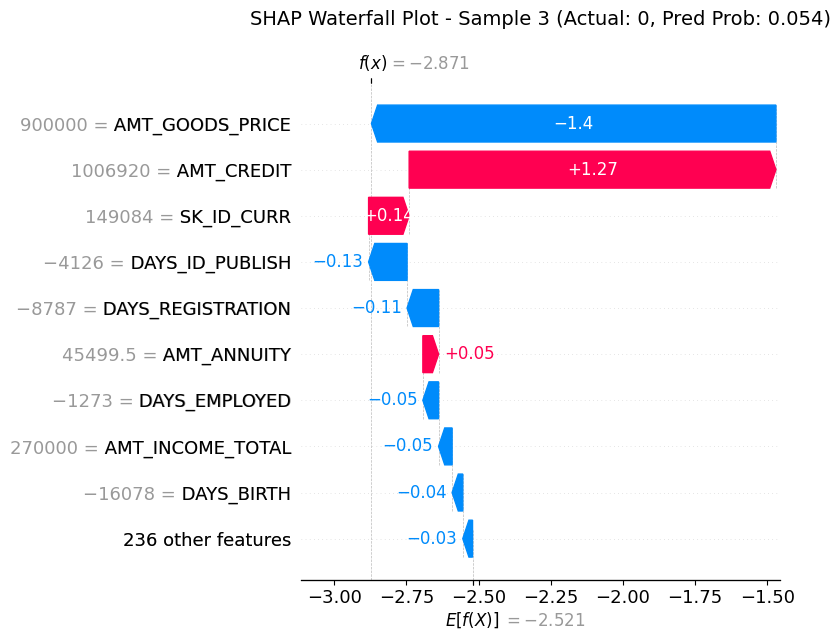

In [28]:
# SHAP Waterfall Plot - Explain individual predictions
# Select a few interesting samples to explain
sample_indices = [0, 1, 2]  # First three samples

for i, idx in enumerate(sample_indices):
    actual_label = y_test_sample.iloc[idx]
    predicted_prob = model.predict_proba(X_test_sample.iloc[[idx]])[0, 1]
    
    print(f"\n=== SAMPLE {i+1} (Index {idx}) ===")
    print(f"Actual label: {actual_label}")
    print(f"Predicted probability (class 1): {predicted_prob:.4f}")
    
    # Create waterfall plot
    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_to_use[idx], 
            base_values=base_value, 
            data=X_test_sample.iloc[idx],
            feature_names=X_test_sample.columns.tolist()
        ),
        show=False
    )
    plt.title(f'SHAP Waterfall Plot - Sample {i+1} (Actual: {actual_label}, Pred Prob: {predicted_prob:.3f})', 
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()